In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import networkx as nx
import scipy as sp
import re

%matplotlib notebook

**Public Bucket for csv https://storage.googleapis.com/datascibucket/cs505/oct_committers.csv**

In [18]:
df = pd.read_csv('oct_committers.csv')

In [19]:
df = df.dropna()
df.head(100)

,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,Tim Gardner,c65a040f7f664378353fb65fc3553df208a14f68@canon...,2016-10-03 01:19:38 UTC,endlessm/linux,454
1,Arno Candel,329f27436ec86be242c31f07766a746ac09e1189@gmail...,2016-10-14 22:42:01 UTC,h2oai/h2o-3,274
2,Vishal Moorthy,6e7e1cdd421bd9e00a7327c63e6b6dc428aeec90@gmail...,2016-10-23 15:17:36 UTC,Veeshal/openmrs-core,199
3,Omar Sahyoun,a96b2b56dc28a05e55acddfc13ca13060f61ada2@gmail...,2016-10-18 16:28:21 UTC,SumOfUs/Champaign,194
4,Michael James Gratton,a17fed27eaa842282862ff7c1b9c8395a26ac320@vee.net,2016-10-03 23:58:17 UTC,GNOME/geary,177
5,Mihail Muhin,8ae75315e10eaef2abb8a518e742a2cdf5fccbe1@jetbr...,2016-10-02 15:05:48 UTC,mihmuh/IntelliJConsole,149
6,Nicolas Matthew Vinson Wauquiez,18f132293a70890e40b1f942be35644307cd0085@gmail...,2016-10-26 03:15:13 UTC,NMVW/pluribus,147
7,calebmer,024ddedc1e44b2a2266115975956c072dec65389@gmail...,2016-10-09 22:59:36 UTC,calebmer/postgraphql,141
8,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,spinnaker/spinnaker,139
9,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,skim1420/spinnaker,139


In [20]:
# only gets rows where there is a valid email for the user
df_valid_emails = df[df.committer_email.str.contains(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", regex=True)]
df_valid_emails.head(100)

C:\Users\Brian\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,Tim Gardner,c65a040f7f664378353fb65fc3553df208a14f68@canon...,2016-10-03 01:19:38 UTC,endlessm/linux,454
1,Arno Candel,329f27436ec86be242c31f07766a746ac09e1189@gmail...,2016-10-14 22:42:01 UTC,h2oai/h2o-3,274
2,Vishal Moorthy,6e7e1cdd421bd9e00a7327c63e6b6dc428aeec90@gmail...,2016-10-23 15:17:36 UTC,Veeshal/openmrs-core,199
3,Omar Sahyoun,a96b2b56dc28a05e55acddfc13ca13060f61ada2@gmail...,2016-10-18 16:28:21 UTC,SumOfUs/Champaign,194
4,Michael James Gratton,a17fed27eaa842282862ff7c1b9c8395a26ac320@vee.net,2016-10-03 23:58:17 UTC,GNOME/geary,177
5,Mihail Muhin,8ae75315e10eaef2abb8a518e742a2cdf5fccbe1@jetbr...,2016-10-02 15:05:48 UTC,mihmuh/IntelliJConsole,149
6,Nicolas Matthew Vinson Wauquiez,18f132293a70890e40b1f942be35644307cd0085@gmail...,2016-10-26 03:15:13 UTC,NMVW/pluribus,147
7,calebmer,024ddedc1e44b2a2266115975956c072dec65389@gmail...,2016-10-09 22:59:36 UTC,calebmer/postgraphql,141
8,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,spinnaker/spinnaker,139
9,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,skim1420/spinnaker,139


In [21]:
# Group by repo_name so the results are rows with repo_names with counts for contributions
unique_emailandrepo_df = df_valid_emails.groupby(['committer_email', 'committer_name', 'repo_name'], as_index=False).aggregate(np.sum).sort_values('total_num_commits', ascending=False)
unique_emailandrepo_df.reset_index()

,index,committer_email,committer_name,repo_name,total_num_commits
0,57788,1a73af9e7ae00182733b2292511b814be66f065f@pyjob...,pyjobs,pyjobs/annonces,13433
1,128190,7555aa909aeefc4b48a22650b82530052cae90a6@gmail...,nathanbl,nathanbl/date-info,4088
2,222469,f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail...,Nathan Chancellor,RootWizard/MagiKernel,3992
3,3963,0554fcc8949639c36b54e10d0ec815032383f759@sina.cn,Pearyman,Pearyman/webexamples,3809
4,76832,333a0a56843ecfbd7d1f247ae3587f84236536bc@hotma...,miatribepi,miatribe/pipvpspy,3667
5,7114,0968282e15ed9e224ab3a4b5d1973c8f7097dcea@gmail...,Ryan Niehaus,ryanniehaus/open_source_package_builder,3479
6,222468,f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail...,Nathan Chancellor,Miccia94/kernel_moto_shamu,2935
7,107190,5bb7cf2571ba39bcffbb6c25fc088ed51ff9ed06@gmail...,REV3NT3CH,B14CKB1RD-Kernel/B14CKB1RD_Kernel_N6,2909
8,77134,33bdcd680497cab5d61957b985513fceb724a953@gmail...,marcomow,marcomow/keklv,2289
9,132264,7a89f8c141f243fdebb219cb07878db4e9efb474@gmail...,pbaffiliate1,pbaffiliate1/testRepository,1903


In [28]:
def calculate_core_dec(graph):
    core_dec = nx.core_number(graph)
    #print(core, "\n")
    print("Graph: {}, Max Core number: {}".format(graph.name, max(core_dec.values())))
    
    return core_dec

In [57]:
#Plot the networks with networkx

colors = ['#787878', '#856b6b', '#965a5b', '#a7494b', '#bb3537', '#cb2528', '#cb2528', '#f00004']

def plot_network(graphs, layout, node_size, with_labels):

    for i, graph in enumerate(graphs):
        core_dec = calculate_core_dec(graph)
        node_colors = [ colors[core_dec[v]] for v in graph.nodes()]
        plt.figure()
        if layout == '':
            nx.draw(graph, node_color=node_colors, with_labels=with_labels, node_size=node_size)
        elif layout == 'circular_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.circular_layout(graph), with_labels=with_labels, node_size=node_size)
        elif layout == 'random_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.random_layout(graph), with_labels=with_labels, node_size=node_size)
        elif layout == 'shell_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.shell_layout(graph), with_labels=with_labels, node_size=node_size)
        else:
            nx.draw(graph, node_color=node_colors, pos=nx.spectral_layout(graph), with_labels=with_labels, node_size=node_size) 

## Degree distribution

In [58]:
#Degree distributions
def plot_degree_distributions(graphs):
    for graph in graphs:
        degree_sequence=sorted(nx.degree(graph).values(),reverse=True) 
        dmax=max(degree_sequence)
        print('Degree max for {}: {}'.format(graph, dmax))
        
        plt.figure()
        h,bins,patches = plt.hist(degree_sequence,bins=range(0,dmax))
        plt.title("Degree distribution for {}".format(graph.name))
        plt.xlabel("degree")
        plt.ylabel("number of nodes")

# plot_degree_distributions([G_onlyrepos, G_onlyusers])

The degree distribution looks like what you would expect from a small world network, given that there are very few with high degrees but they do exist unlike a degree distribution of a random network.

## Clustering Coefficients and Stats

In [32]:
def print_stats_of_notconnected(graphs):
    for graph in graphs:
        print('Stats for {}:'.format(graph.name))
        #print('\tDiameter: {}'.format(nx.diameter(graph)))
        #print('\tAverage shortest path length: {}'.format(nx.average_shortest_path_length(graph)))
        
        ccall = nx.clustering(graph)
        ave_clustering_coefficient = nx.average_clustering(graph)
        print('\tAverage clustering coefficient: {}'.format(ave_clustering_coefficient))
        
def print_stats_of_connected(graphs):
    for graph in graphs:
        print('Stats for {}:'.format(graph.name))
        print('\tDiameter: {}'.format(nx.diameter(graph)))
        print('\tAverage shortest path length: {}'.format(nx.average_shortest_path_length(graph)))
        
        ccall = nx.clustering(graph)
        ave_clustering_coefficient = nx.average_clustering(graph)
        print('\tAverage clustering coefficient: {}'.format(ave_clustering_coefficient))
        
        
def plot_clusteringcoeff_distributions(graphs):
    for graph in graphs:
        plt.figure()
        h,bins,patches = plt.hist(list(nx.clustering(graph).values()))
        plt.title("Clustering coefficient distribution for {}".format(graph.name))
        plt.ylabel("number of nodes")

## Create Graphs

In [44]:
B = nx.Graph()
B.add_nodes_from(unique_emailandrepo_df['committer_email'].head(5000),bipartite=0)
B.add_nodes_from(unique_emailandrepo_df['repo_name'].head(5000),bipartite=1)
B.add_edges_from(unique_emailandrepo_df[['committer_email','repo_name']].head(5000).values)
nx.bipartite.is_bipartite(B)
B.name = 'Bipartite Graph of Users and Repositories'

nx.write_gml(B, 'bipartite_graph.gml')

In [52]:
one_mode_users = bipartite.projected_graph(B, unique_emailandrepo_df['committer_email'].head(5000))
one_mode_users.name = 'One-mode Bipartite Graph of Users'
nx.write_gml(one_mode_users, 'one_mode_users.gml')

In [53]:
one_mode_repos = bipartite.projected_graph(B, unique_emailandrepo_df['repo_name'].head(5000))
one_mode_repos.name = 'One-mode Bipartite Graph of Repositories'
nx.write_gml(one_mode_repos, 'one_mode_repos.gml')

In [ ]:
#Plot graphs
node_size = 50
with_labels = False
plot_network([G_onlyrepos, G_onlyusers], '', node_size, with_labels)

# TODO: Get graphs from GEPHI

## Analyze Graphs

### Degree Distributions:

Degree max for One-mode Bipartite Graph of Users: 68


<IPython.core.display.Javascript object>


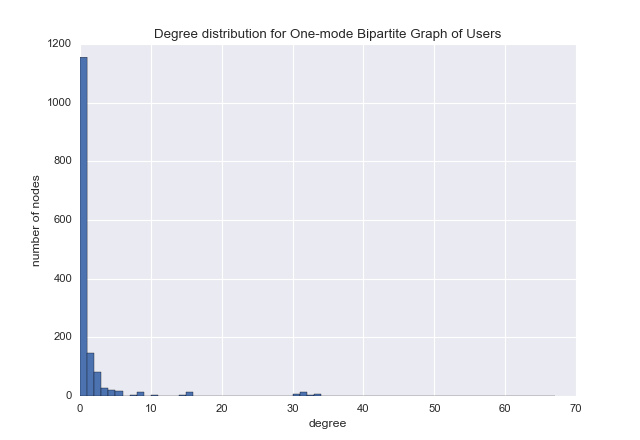

Degree max for One-mode Bipartite Graph of Repositories: 724


<IPython.core.display.Javascript object>


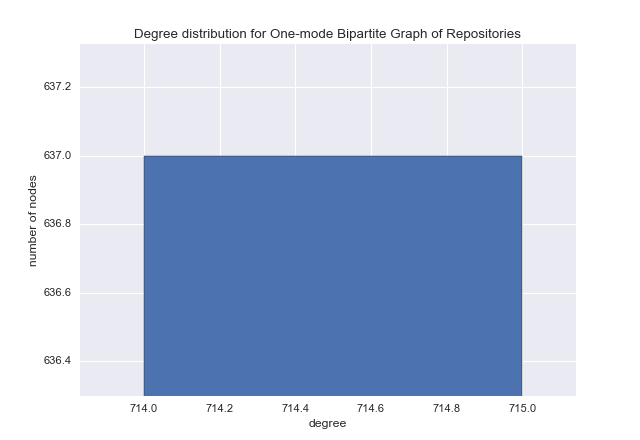

Degree max for Bipartite Graph of Users and Repositories: 715


<IPython.core.display.Javascript object>


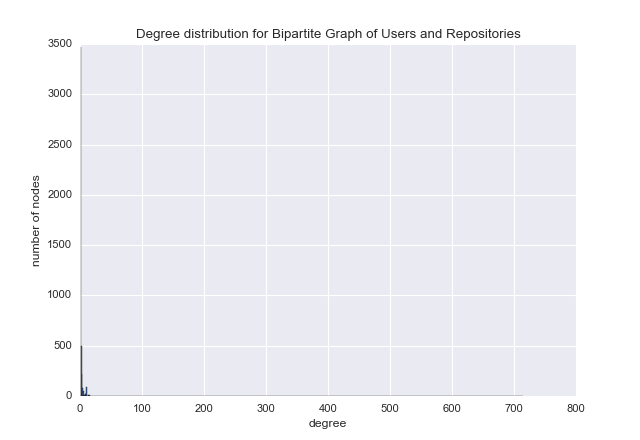

In [54]:
plot_degree_distributions([one_mode_users, one_mode_repos, B])

The graphs look like exponential-log graphs as real-life networks should look, however, there is a weird spike in number of nodes in the one-mode repositories only graph, with a high degree. There are exactly 637 nodes representing repos with degrees of exactly 714. This could mean there are 714 repositories that a set of users (like developers in a company) needed to contribute to for some reason. When observing the graph visually, there is a massive cluster of interconnected nodes that represents this spike in data.

In [ ]:
#Get the repos with degree = 714


### Clustering Coefficient Distributions:

Stats for One-mode Bipartite Graph of Users:
	Average clustering coefficient: 0.1359393879515097
Stats for One-mode Bipartite Graph of Repositories:
	Average clustering coefficient: 0.5872608464613176
Stats for Bipartite Graph of Users and Repositories:
	Average clustering coefficient: 0.0


<IPython.core.display.Javascript object>


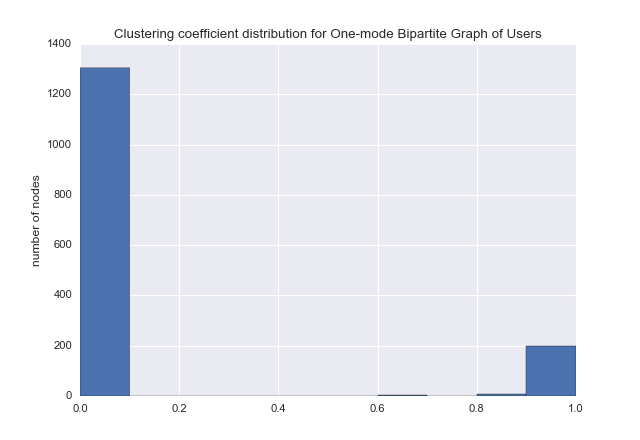

<IPython.core.display.Javascript object>


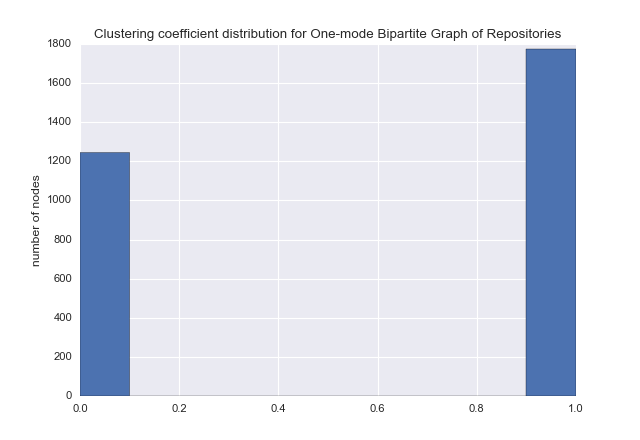

<IPython.core.display.Javascript object>


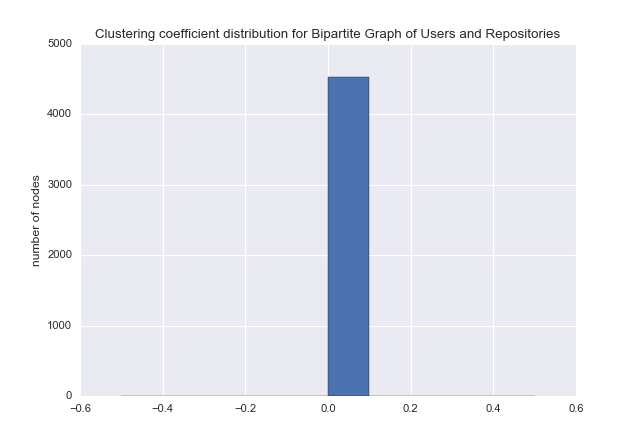

In [56]:
#Plot Clustering Coefficients of graph of repos and graph of users
print_stats_of_notconnected([one_mode_users, one_mode_repos, B])
plot_clusteringcoeff_distributions([one_mode_users, one_mode_repos, B])

It makes sense that there would be such a vast difference in clustering coefficients, due to the connectivity observed between repositories. Of the nodes with degrees greater than 0, usually there are highly interconnected subgraphs between users or repositories. The bipartite graph of course has clustering coefficients of 0 because there is no possible way for a triangle to form between connected triplets of nodes.  